# Bab Pengenalan

    Nama  : Farand Austen Mahesa
    Kelas : Full Bootcamp Data Science
    

Tujuan Program
>Pada program ini akan dilakukan uji hipotesis pada tabel, untuk mengecek apakah data tersebut terdistribusi secara normal, apakah ada kaitannya hubungan antara kolom satu dengan yang lain, apakah diambil secara random dan sebagainya yang diperlukan untuk hipotesis testing. 


Isi notebook dibawah ini berupa:
   - Perkenalan
   - Import pustaka yang dibutuhkan
   - Data Loading
   - Data Cleaning
   - Eksplorasi Data
   - Measure of Central Tendency
   - Measures of Variance
   - Hyphothesis Testing
   - Pengambilan Kesimpulan

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi

# Preprocessing

In [2]:
df = pd.read_csv("ks-projects-201612.csv")
dg = pd.read_csv("ks-projects-201801.csv")

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dg.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

ID                     0
name                   4
category               5
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3790
Unnamed: 13       323125
Unnamed: 14       323738
Unnamed: 15       323746
Unnamed: 16       323749
dtype: int64

In [6]:
dg.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
df = df.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis = 1)
df['name '].fillna('-', inplace =True)
df['category '].fillna('-', inplace =True)
df['usd pledged '].fillna(0, inplace =True)

In [8]:
dg['name'].fillna('-', inplace =True)
dg['usd pledged'].fillna(0, inplace =True)

In [9]:
df.isna().sum()

ID                0
name              0
category          0
main_category     0
currency          0
deadline          0
goal              0
launched          0
pledged           0
state             0
backers           0
country           0
usd pledged       0
dtype: int64

In [10]:
dg.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [11]:
df = df.rename(
    columns={
        "name " : "name" ,
        "category " : "category",
        "main_category " :"main_category",
        "currency " : "currency" ,
        "deadline " : "deadline",
        "goal " :"goal",
        "launched " : "launched" ,
        "pledged " : "pledged",
        "state " : "state",
        "backers " : "backers",
        "usd pledged " : "usd_pledged"
    })

In [12]:
dg = dg.rename(
        columns = {
            "usd pledged" : "usd_pledged"
        })

In [13]:
dg.describe()

,ID,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,6.966168e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.824761e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.345000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.750000e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.000000e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


# Distribution Fit

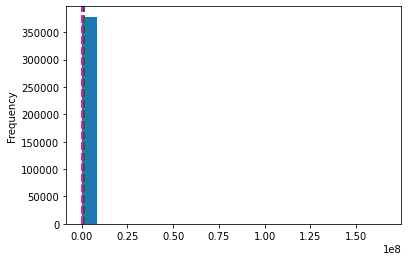

In [14]:
dg['usd_goal_real'].plot.hist(bins=20)
plt.axvline(dg['goal'].describe()['mean'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(dg['goal'].describe()['50%'], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(dg['goal'].describe()['mean'] + dg['goal'].describe()['std'], color='green', linestyle='dashed', linewidth=2)

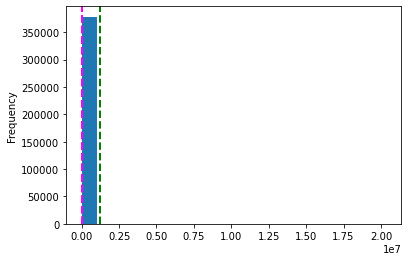

In [15]:
dg['usd_pledged_real'].plot.hist(bins=20)
plt.axvline(dg['pledged'].describe()['mean'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(dg['pledged'].describe()['50%'], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(dg['pledged'].describe()['mean'] + dg['goal'].describe()['std'], color='green', linestyle='dashed', linewidth=2)

# Measure of Central Tendency :
- Mean
- Median
- Mode

In [16]:
colom = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in colom:
    print ('Mean ' + dg[col].name + ' = ' + str(dg[col].mean()))

Mean goal = 49080.79152056854
Mean pledged = 9682.97933946224
Mean backers = 105.61747578969052
Mean usd_pledged = 6966.168499106134
Mean usd_pledged_real = 9058.924074119337
Mean usd_goal_real = 45454.40146545336


In [17]:
colom = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in colom:
    print ('Median ' + dg[col].name + ' = ' + str(dg[col].median()))

Median goal = 5200.0
Median pledged = 620.0
Median backers = 12.0
Median usd_pledged = 375.0
Median usd_pledged_real = 624.33
Median usd_goal_real = 5500.0


In [18]:
colom = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in colom:
    print ('Modus ' + dg[col].name + ' = ' + str(dg[col].mode()[0]))

Modus goal = 5000.0
Modus pledged = 0.0
Modus backers = 0
Modus usd_pledged = 0.0
Modus usd_pledged_real = 0.0
Modus usd_goal_real = 5000.0


# Measure of Variance :
- Range
- Variance
- Standart Deviation

In [19]:
colom = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in colom:
    print ('Range ' + dg[col].name + ' = ' + str(dg[col].max() - dg[col].min()))

Range goal = 99999999.99
Range pledged = 20338986.27
Range backers = 219382
Range usd_pledged = 20338986.27
Range usd_pledged_real = 20338986.27
Range usd_goal_real = 166361390.70000002


In [20]:
colom = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in colom:
    print ('Varians ' + dg[col].name + ' = ' + str(dg[col].var()))

Varians goal = 1400414872097.0361
Varians pledged = 9146246409.673967
Varians backers = 822984.6873539966
Varians usd_pledged = 6122689132.431702
Varians usd_pledged_real = 8276149156.121636
Varians usd_goal_real = 1329293829528.3057


In [21]:
colom = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in colom:
    print ('Standard Derivation ' + dg[col].name + ' = ' + str(dg[col].std()))

Standard Derivation goal = 1183391.2590927128
Standard Derivation pledged = 95636.01000498697
Standard Derivation backers = 907.1850347938928
Standard Derivation usd_pledged = 78247.6142283693
Standard Derivation usd_pledged_real = 90973.34310731708
Standard Derivation usd_goal_real = 1152950.0550883831


# Confidence Intervals

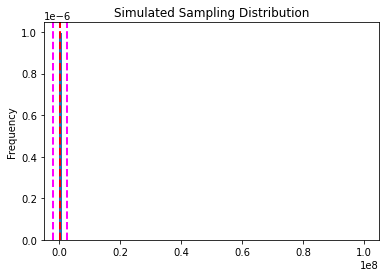

Sampling Mean: 49080.79152056854
Sampling StdErr: 1183391.2590927128
95% Confidence Interval: (-2270323.455920656, 2368485.0389617933)


In [22]:
#GOAL
goal1 = dg['goal']
ma = goal1.mean()
sd = goal1.std()
ci = stats.norm.interval(0.95, ma, sd)

# Plot the distribution, mean, and CI
goal1.plot.hist(title='Simulated Sampling Distribution', bins=100, density=True) 
plt.axvline(ma, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(ma))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

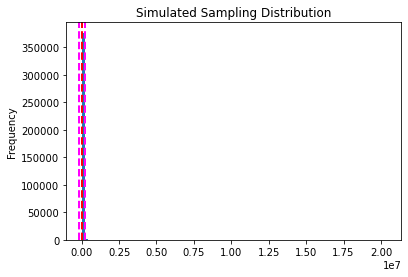

Sampling Mean: 9682.97933946224
Sampling StdErr: 95636.01000498697
95% Confidence Interval: (-177760.15589542448, 197126.11457434896)


In [23]:
#PLEDGED
goal2 = dg['pledged']
m = goal2.mean()
sd = goal2.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
goal2.plot.hist(title='Simulated Sampling Distribution', bins=100) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

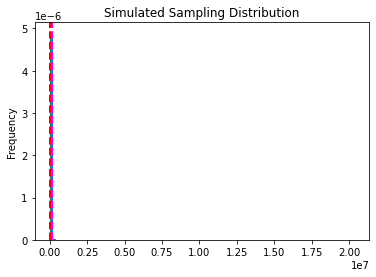

Sampling Mean: 6966.168499106134
Sampling StdErr: 78247.6142283693
95% Confidence Interval: (-146396.33726468158, 160328.67426289385)


In [24]:
#USD PLEDGED
goal3 = dg['usd_pledged']
m = goal3.mean()
sd = goal3.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
goal3.plot.hist(title='Simulated Sampling Distribution', bins=100, density = True) 
#plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

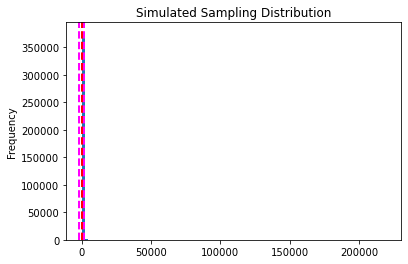

Sampling Mean: 105.61747578969052
Sampling StdErr: 907.1850347938928
95% Confidence Interval: (-1672.432519720055, 1883.6674712994363)


In [25]:
#BACKERS
goal4 = dg['backers']
m = goal4.mean()
sd = goal4.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
goal4.plot.hist(title='Simulated Sampling Distribution', bins=100) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

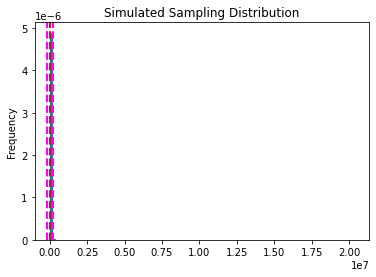

Sampling Mean: 9058.924074119337
Sampling StdErr: 90973.34310731708
95% Confidence Interval: (-169245.55196942732, 187363.400117666)


In [26]:
#usd_pledged_real
goal5 = dg['usd_pledged_real']
m = goal5.mean()
sd = goal5.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
goal5.plot.hist(title='Simulated Sampling Distribution', bins=100, density=True) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

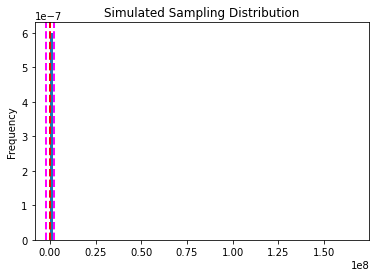

Sampling Mean: 45454.40146545336
Sampling StdErr: 1152950.0550883831
95% Confidence Interval: (-2214286.182481249, 2305194.9854121553)


In [27]:
#usd_goal_real
goal6 = dg['usd_goal_real']
m = goal6.mean()
sd = goal6.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
goal6.plot.hist(title='Simulated Sampling Distribution', bins=100, density=True) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

# Hyphothesis Testing

# 1. CHI2 TESTING

Chi2 testing digunakan ketika Anda ingin tahu apakah efeknya nyata atau mungkin tidak. Uji CHI Square digunakan untuk menguji dua kelompok data baik variabel independen maupun dependennya berbentuk kategorik atau dapat juga dikatakan sebagai uji proporsi untuk dua peristiwa atau lebih, sehingga datanya bersifat diskrit. Misalnya ingin mengetahui hubungan antara status gizi ibu (baik atau kurang) dengan kejadian BBLR (ya atau tidak)

- H0 = Di suatu populasi yang sama, dua kategorikal variabel tidak berhubungan
- H1 = Di suatu populasi yang sama, dua kategorikal variabel berhubungan

In [28]:
#Sample 1
df_crosstab = pd.crosstab(dg['main_category'], dg['category'])
chisq, pvalue, df, expected = stats.chi2_contingency(df_crosstab)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
df_crosstab

Observed chi2: 5153170.51
P-value: 0.0000


category,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,...,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
main_category,,,,,,,,,,,,,,,,,,,,,
Art,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comics,0,0,0,0,0,0,405,0,0,0,...,0,0,0,648,0,0,0,0,0,0
Crafts,0,0,0,0,0,0,0,0,0,0,...,0,93,0,0,0,1167,0,0,0,0
Dance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,164,0,0,0
Design,0,0,0,0,0,0,0,0,0,760,...,0,0,0,0,0,0,0,0,0,0
Fashion,0,0,3165,0,0,0,0,7166,0,0,...,0,0,0,0,0,0,0,0,0,0
Film & Video,0,0,0,740,0,2541,0,0,0,0,...,0,0,0,0,5762,0,0,0,0,0
Food,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Games,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
dg_pivot = dg.groupby(['main_category', 'category']).count()[['state']].reset_index()
dg_pivot = dg_pivot.pivot_table(index = 'main_category', columns= 'category', values = 'state').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(dg_pivot)
print(f'df: {df:.2f}')
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_pivot

df: 2212.00
Observed chi2: 5153170.51
P-value: 0.0000


category,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,...,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
main_category,,,,,,,,,,,,,,,,,,,,,
Art,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comics,0.0,0.0,0.0,0.0,0.0,0.0,405.0,0.0,0.0,0.0,...,0.0,0.0,0.0,648.0,0.0,0.0,0.0,0.0,0.0,0.0
Crafts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,93.0,0.0,0.0,0.0,1167.0,0.0,0.0,0.0,0.0
Dance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,164.0,0.0,0.0,0.0
Design,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,760.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fashion,0.0,0.0,3165.0,0.0,0.0,0.0,0.0,7166.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Film & Video,0.0,0.0,0.0,740.0,0.0,2541.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5762.0,0.0,0.0,0.0,0.0,0.0
Food,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Games,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Sample 2
dg_pivot2 = dg.groupby(['state', 'category']).count()[['main_category']].reset_index()
dg_pivot2= dg_pivot2.pivot_table(index = 'state', columns= 'category', values = 'main_category').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(dg_pivot2)
print(f'df: {df:.2f}')
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_pivot2

df: 790.00
Observed chi2: 83380.87
P-value: 0.0000


category,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,...,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
state,,,,,,,,,,,,,,,,,,,,,
canceled,91.0,115.0,340.0,109.0,18.0,306.0,37.0,864.0,952.0,96.0,...,221.0,8.0,746.0,44.0,587.0,92.0,10.0,143.0,96.0,26.0
failed,326.0,589.0,1667.0,514.0,166.0,1531.0,216.0,4752.0,4909.0,463.0,...,579.0,55.0,3866.0,241.0,3450.0,766.0,98.0,1018.0,538.0,176.0
live,8.0,11.0,53.0,7.0,3.0,16.0,9.0,109.0,79.0,11.0,...,23.0,1.0,56.0,4.0,15.0,11.0,4.0,13.0,10.0,9.0
successful,242.0,188.0,1073.0,107.0,63.0,682.0,521.0,1414.0,378.0,179.0,...,388.0,27.0,443.0,358.0,1698.0,292.0,50.0,922.0,172.0,179.0
suspended,15.0,13.0,29.0,3.0,5.0,6.0,1.0,27.0,27.0,11.0,...,22.0,2.0,42.0,1.0,12.0,6.0,2.0,6.0,5.0,1.0
undefined,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Sample 3
dg_pivot3 = dg.groupby(['main_category', 'state']).count()[['category']].reset_index()
dg_pivot3= dg_pivot3.pivot_table(index = 'state', columns= 'main_category', values = 'category').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(dg_pivot3)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_pivot3

Observed chi2: 30118.71
P-value: 0.0000


main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,2222.0,842.0,843.0,163.0,4152.0,2650.0,5755.0,2211.0,6202.0,523.0,3305.0,986.0,3602.0,4715.0,608.0
failed,14131.0,4036.0,5703.0,1235.0,14814.0,14182.0,32904.0,15969.0,16003.0,3137.0,21752.0,6384.0,23145.0,20616.0,3708.0
live,194.0,76.0,76.0,18.0,305.0,250.0,332.0,184.0,287.0,31.0,281.0,48.0,299.0,377.0,41.0
successful,11510.0,5842.0,2115.0,2338.0,10550.0,5593.0,23623.0,6085.0,12518.0,1012.0,24197.0,3305.0,12300.0,6434.0,6534.0
suspended,96.0,23.0,72.0,13.0,247.0,138.0,117.0,153.0,220.0,52.0,149.0,55.0,66.0,424.0,21.0
undefined,0.0,0.0,0.0,1.0,2.0,3.0,854.0,0.0,1.0,0.0,2234.0,1.0,462.0,3.0,1.0


In [32]:
#Sample 4
dg_pivot4 = dg.groupby(['currency', 'country']).count()[['category']].reset_index()
dg_pivot4= dg_pivot4.pivot_table(index = 'currency', columns= 'country', values = 'category').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(dg_pivot4)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_pivot4

Observed chi2: 4873466.84
P-value: 0.0000


country,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,...,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US
currency,,,,,,,,,,,,,,,,,,,,,
AUD,0.0,7839.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0
CAD,0.0,0.0,0.0,14756.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,206.0,0.0,0.0,0.0,0.0,0.0,0.0
CHF,0.0,0.0,0.0,0.0,761.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
DKK,0.0,0.0,0.0,0.0,0.0,0.0,1113.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
EUR,597.0,0.0,617.0,0.0,0.0,4171.0,0.0,2276.0,2939.0,0.0,...,0.0,62.0,0.0,186.0,2868.0,0.0,0.0,0.0,0.0,0.0
GBP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33672.0,...,0.0,0.0,0.0,460.0,0.0,0.0,0.0,0.0,0.0,0.0
HKD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JPY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MXN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1752.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Sample 5
dg_pivot5 = dg.groupby(['main_category', 'currency']).count()[['state']].reset_index()
dg_pivot5= dg_pivot5.pivot_table(index = 'main_category', columns= 'currency', values = 'state').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(dg_pivot5)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_pivot5

Observed chi2: 15148.82
P-value: 0.0000


currency,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
main_category,,,,,,,,,,,,,,
Art,425.0,1067.0,48.0,89.0,1083.0,2667.0,34.0,2.0,160.0,34.0,91.0,112.0,30.0,22311.0
Comics,188.0,521.0,6.0,15.0,204.0,867.0,8.0,0.0,35.0,17.0,16.0,25.0,7.0,8910.0
Crafts,183.0,426.0,22.0,33.0,391.0,904.0,12.0,0.0,63.0,17.0,43.0,37.0,30.0,6648.0
Dance,32.0,94.0,4.0,3.0,78.0,280.0,1.0,0.0,24.0,7.0,8.0,7.0,1.0,3229.0
Design,929.0,1500.0,132.0,175.0,2054.0,2706.0,236.0,8.0,108.0,62.0,157.0,172.0,140.0,21691.0
Fashion,717.0,1060.0,65.0,77.0,1435.0,2372.0,45.0,8.0,76.0,41.0,101.0,128.0,104.0,16587.0
Film & Video,973.0,1760.0,57.0,114.0,1407.0,5894.0,10.0,1.0,317.0,78.0,196.0,207.0,16.0,52555.0
Food,477.0,1047.0,50.0,60.0,991.0,1649.0,10.0,0.0,102.0,48.0,100.0,103.0,23.0,19942.0
Games,961.0,1884.0,65.0,105.0,2728.0,4013.0,76.0,10.0,148.0,85.0,183.0,275.0,59.0,24639.0


In [34]:
#Sample 6
dg_pivot6 = dg.groupby(['state', 'currency']).count()[['country']].reset_index()
dg_pivot6= dg_pivot6.pivot_table(index = 'state', columns= 'currency', values = 'country').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(dg_pivot6)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_pivot6

Observed chi2: 5016.51
P-value: 0.0000


currency,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
state,,,,,,,,,,,,,,
canceled,1067.0,2138.0,84.0,157.0,2389.0,3763.0,87.0,8.0,221.0,112.0,151.0,209.0,67.0,28326.0
failed,4610.0,8238.0,465.0,567.0,10496.0,17395.0,261.0,16.0,1015.0,421.0,826.0,1001.0,276.0,152132.0
live,70.0,132.0,14.0,16.0,329.0,279.0,35.0,9.0,107.0,8.0,11.0,20.0,28.0,1741.0
successful,2011.0,4137.0,187.0,362.0,3882.0,12081.0,216.0,7.0,396.0,163.0,448.0,509.0,178.0,109379.0
suspended,89.0,116.0,11.0,14.0,147.0,178.0,19.0,0.0,13.0,6.0,11.0,19.0,6.0,1217.0
undefined,103.0,201.0,7.0,13.0,162.0,436.0,0.0,0.0,0.0,12.0,28.0,30.0,0.0,2570.0


In [35]:
#Sample 7
dg_pivot7 = dg.groupby(['state', 'country']).count()[['currency']].reset_index()
dg_pivot7 = dg_pivot7.pivot_table(index = 'state', columns= 'country', values = 'currency').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(dg_pivot7)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_pivot7

Observed chi2: 360140.57
P-value: 0.0000


country,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,...,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US
state,,,,,,,,,,,,,,,,,,,,,
canceled,91.0,1065.0,74.0,2138.0,84.0,621.0,157.0,331.0,353.0,3761.0,...,8.0,4.0,221.0,22.0,396.0,112.0,151.0,209.0,67.0,28311.0
failed,378.0,4606.0,371.0,8236.0,465.0,2499.0,566.0,1381.0,1612.0,17387.0,...,16.0,38.0,1015.0,105.0,1794.0,420.0,826.0,1000.0,276.0,152061.0
live,15.0,70.0,12.0,132.0,14.0,75.0,16.0,52.0,52.0,279.0,...,9.0,1.0,107.0,1.0,35.0,8.0,11.0,20.0,28.0,1740.0
successful,107.0,2010.0,152.0,4134.0,187.0,937.0,360.0,492.0,908.0,12067.0,...,7.0,19.0,396.0,105.0,617.0,162.0,448.0,509.0,178.0,109299.0
suspended,6.0,88.0,8.0,116.0,11.0,39.0,14.0,20.0,14.0,178.0,...,0.0,0.0,13.0,2.0,26.0,6.0,11.0,19.0,6.0,1216.0
undefined,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3562.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#Sample 8
dg_pivot8 = dg.groupby(['category', 'currency']).count()[['main_category']].reset_index()
dg_pivot8 = dg_pivot8.pivot_table(index = 'currency', columns= 'category', values = 'main_category').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(dg_pivot8)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_pivot8

Observed chi2: 29889.57
P-value: 0.0000


category,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,...,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
currency,,,,,,,,,,,,,,,,,,,,,
AUD,19.0,22.0,127.0,19.0,11.0,44.0,23.0,258.0,300.0,30.0,...,29.0,4.0,248.0,10.0,88.0,17.0,4.0,17.0,26.0,15.0
CAD,44.0,50.0,209.0,36.0,18.0,105.0,52.0,361.0,372.0,42.0,...,79.0,6.0,332.0,63.0,173.0,47.0,13.0,63.0,49.0,30.0
CHF,1.0,2.0,23.0,0.0,0.0,4.0,0.0,13.0,47.0,0.0,...,6.0,0.0,32.0,0.0,2.0,4.0,0.0,3.0,2.0,0.0
DKK,3.0,1.0,14.0,1.0,0.0,4.0,0.0,18.0,52.0,6.0,...,5.0,0.0,51.0,1.0,6.0,9.0,1.0,4.0,6.0,3.0
EUR,115.0,93.0,302.0,42.0,24.0,77.0,27.0,429.0,771.0,67.0,...,134.0,7.0,614.0,19.0,87.0,59.0,6.0,90.0,42.0,34.0
GBP,69.0,92.0,359.0,97.0,34.0,231.0,90.0,716.0,645.0,68.0,...,98.0,12.0,598.0,29.0,332.0,84.0,16.0,118.0,55.0,84.0
HKD,10.0,2.0,15.0,0.0,0.0,0.0,1.0,14.0,11.0,1.0,...,10.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
JPY,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MXN,4.0,14.0,15.0,1.0,2.0,19.0,8.0,25.0,80.0,6.0,...,10.0,5.0,34.0,7.0,14.0,5.0,4.0,19.0,13.0,1.0


In [37]:
#Sample 9
dg_pivot9 = dg.groupby(['main_category', 'country']).count()[['category']].reset_index()
dg_pivot9 = dg_pivot9.pivot_table(index = 'main_category', columns= 'country', values = 'category').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(dg_pivot9)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_pivot9

Observed chi2: 25080.67
P-value: 0.0000


country,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,...,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US
main_category,,,,,,,,,,,,,,,,,,,,,
Art,40.0,425.0,45.0,1067.0,48.0,221.0,89.0,163.0,175.0,2667.0,...,2.0,4.0,160.0,0.0,191.0,34.0,91.0,112.0,30.0,22311.0
Comics,6.0,188.0,9.0,521.0,6.0,47.0,15.0,36.0,33.0,867.0,...,0.0,1.0,35.0,0.0,17.0,17.0,16.0,25.0,7.0,8910.0
Crafts,13.0,183.0,21.0,426.0,22.0,95.0,33.0,42.0,77.0,904.0,...,0.0,0.0,63.0,0.0,60.0,17.0,43.0,37.0,30.0,6648.0
Dance,3.0,32.0,1.0,94.0,4.0,20.0,3.0,7.0,18.0,280.0,...,0.0,0.0,24.0,1.0,16.0,7.0,8.0,7.0,1.0,3228.0
Design,82.0,929.0,71.0,1500.0,132.0,563.0,175.0,218.0,304.0,2706.0,...,8.0,6.0,108.0,3.0,346.0,62.0,157.0,172.0,140.0,21690.0
Fashion,37.0,717.0,54.0,1060.0,65.0,287.0,77.0,193.0,254.0,2372.0,...,8.0,4.0,76.0,4.0,274.0,41.0,101.0,128.0,104.0,16584.0
Film & Video,51.0,940.0,47.0,1703.0,55.0,314.0,112.0,169.0,274.0,5782.0,...,1.0,3.0,317.0,888.0,213.0,75.0,189.0,202.0,16.0,51922.0
Food,42.0,477.0,37.0,1047.0,50.0,227.0,60.0,115.0,136.0,1649.0,...,0.0,5.0,102.0,3.0,182.0,48.0,100.0,103.0,23.0,19941.0
Games,69.0,961.0,98.0,1884.0,65.0,665.0,105.0,507.0,502.0,4012.0,...,10.0,4.0,148.0,5.0,412.0,85.0,183.0,275.0,59.0,24636.0


In [38]:
#Sample 10
dg_pivot10 = dg.groupby(['category', 'country']).count()[['state']].reset_index()
dg_pivot10 = dg_pivot10.pivot_table(index = 'category', columns= 'country', values = 'state').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(dg_pivot10)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_pivot10

Observed chi2: 78094.06
P-value: 0.0000


country,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,...,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US
category,,,,,,,,,,,,,,,,,,,,,
3D Printing,5.0,19.0,2.0,44.0,1.0,24.0,3.0,11.0,16.0,69.0,...,0.0,2.0,4.0,1.0,27.0,2.0,5.0,2.0,2.0,407.0
Academic,1.0,22.0,3.0,50.0,2.0,34.0,1.0,16.0,10.0,92.0,...,0.0,1.0,14.0,0.0,12.0,5.0,2.0,14.0,1.0,618.0
Accessories,3.0,127.0,6.0,209.0,23.0,44.0,14.0,55.0,54.0,359.0,...,2.0,1.0,15.0,3.0,40.0,13.0,21.0,38.0,30.0,1994.0
Action,2.0,19.0,2.0,36.0,0.0,12.0,1.0,5.0,4.0,97.0,...,0.0,0.0,1.0,0.0,10.0,3.0,3.0,7.0,0.0,531.0
Animals,0.0,11.0,1.0,18.0,0.0,6.0,0.0,1.0,2.0,34.0,...,0.0,0.0,2.0,0.0,6.0,2.0,2.0,4.0,0.0,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodworking,6.0,17.0,4.0,47.0,4.0,14.0,9.0,5.0,10.0,84.0,...,0.0,0.0,5.0,0.0,7.0,2.0,6.0,5.0,2.0,927.0
Workshops,0.0,4.0,0.0,13.0,0.0,1.0,1.0,1.0,1.0,16.0,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0
World Music,2.0,17.0,4.0,63.0,3.0,15.0,4.0,9.0,18.0,118.0,...,0.0,0.0,19.0,0.0,16.0,7.0,3.0,3.0,2.0,1773.0


# 2. Fisher's Exact Testing

Uji exact fisher digunakan ketika memiliki dua variabel nominal. Data yang dimiliki hanya meliputi 2 baris dan 2 kolom. Fisher Exact Testing lebih akurat daripada uji chi-kuadrat untuk data-data yang berjumlah sedikit. 

> Odds ratio adalah adalah perbandingan dari dua odds. Odds ratio dikhususkan untuk pengukuran pada tabel kontingensi 2×2 atau tabel 2×2 yang merupakan subset dari tabel yang lebih besar.

- H0 = Proporsi relatif dari satu varibel tidak terkait dengan variabel kedua
- H1 = Proporsi relatif dari satu varibel terkait dengan variabel kedua

In [39]:
#Sample 1
dg_exact = dg[(dg.state.isin(['successful', 'canceled'])) & 
              (dg.main_category.isin(['Journalism', 'Food']))
             ].groupby(['state', 'main_category']).count()[['currency']].reset_index()
dg_exact = dg_exact.pivot_table(index = 'state', columns= 'main_category', values = 'currency').fillna(0)
oddsratio, pvalue = stats.fisher_exact(dg_exact)
print(f'Odds ratio: {oddsratio:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_exact

Odds ratio: 0.70
P-value: 0.0000


main_category,Food,Journalism
state,,
canceled,2211,523
successful,6085,1012


In [40]:
#Sample 2
dg_exact2 = dg[(dg.country.isin(['ES', 'FR'])) &
               (dg.main_category.isin(['Journalism', 'Food']))
             ].groupby(['main_category', 'country']).count()[['currency']].reset_index()
dg_exact2 = dg_exact2.pivot_table(index = 'country', columns= 'main_category', values = 'currency').fillna(0)
oddsratio, pvalue = stats.fisher_exact(dg_exact2)
print(f'Odds ratio: {oddsratio:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_exact2

Odds ratio: 0.72
P-value: 0.2391


main_category,Food,Journalism
country,,
ES,115,41
FR,136,35


In [41]:
#Sample 3
dg_exact1 = dg[(dg.country.isin(['US', 'GB'])) &
               (dg.main_category.isin(['Music', 'Film & Video']))
             ].groupby(['main_category', 'country']).count()[['currency']].reset_index()
dg_exact1 = dg_exact1.pivot_table(index = 'country', columns= 'main_category', values = 'currency').fillna(0)
chisq, pvalue, df, expected = stats.chi2_contingency(dg_exact1)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
dg_exact1

Observed chi2: 539.45
P-value: 0.0000


main_category,Film & Video,Music
country,,
GB,5782,2772
US,51922,43238


# 3. Anova Testing

Analisis one way Anova atau uji anova satu faktor pada dasarnya bertujuan untuk membandingkan nilai rata-rata yang terdapat pada variabel terikat di semua kelompok yang dibandingkan. Nilai masing-masing kelompok dilihat berdasarkan pada variabel bebas yang berskala kategori. Analisis anova peruluasan dari teknik independent sample t-test. Anova dapat digunakan untuk kelompok yang berjumlah lebih dari 2 serta mempunyai nilai rata-rata yang sama ataupun berbeda
Akan digunakan untuk menganalisis varian untuk menguji hipotesis:
- H0 : Memiliki varian yang sedikit berbeda, bisa dilakukan lebih dari 2 kelompok
- H1 : Memiliki varian yang sangat berbeda, bisa dilakukan lebih dari 2 kelompok

In [42]:
#Sample 1
fvalue, pvalue = stats.f_oneway(dg[dg.state == 'canceled'].pledged,
                                dg[dg.state == 'failed'].pledged,
                                dg[dg.state == 'live'].pledged,
                                dg[dg.state == 'successful'].pledged,
                                dg[dg.state == 'suspended'].pledged,
                                dg[dg.state == 'undefined'].pledged)
print(fvalue, pvalue)

961.9029988439352 0.0


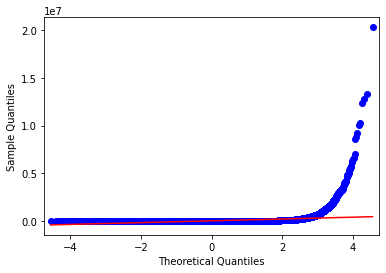

In [43]:
model = smf.ols('pledged ~ C(state)', data = dg).fit()
aov_table = anova_lm(model, typ=2)
residuals = model.resid
fig = sm.qqplot(residuals, line='s')
plt.show()

In [44]:
mc = multi.MultiComparison(dg['pledged'], dg['state'])
result = mc.tukeyhsd()
print(result.summary())

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1     group2     meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------
  canceled     failed   -1218.781 0.1901  -2722.8627    285.3007  False
  canceled       live    6439.488 0.0071   1139.0441  11739.9319   True
  canceled successful  21454.0266  0.001  19892.3505  23015.7028   True
  canceled  suspended   8171.0615 0.0042   1719.5314  14622.5916   True
  canceled  undefined   -366.0781    0.9  -5107.5752    4375.419  False
    failed       live    7658.269  0.001   2503.2387  12813.2994   True
    failed successful  22672.8076  0.001  21714.4419  23631.1734   True
    failed  suspended   9389.8425  0.001   3057.2385  15722.4466   True
    failed  undefined     852.703    0.9  -3725.6622   5431.0681  False
      live successful  15014.5386  0.001   9842.4106  20186.6666   True
      live  suspended   1731.5735    0.9  -6388.4214   9851.5684

In [45]:
#Sample 2
fvalue, pvalue = stats.f_oneway(dg[dg.state == 'canceled'].goal,
                                dg[dg.state == 'failed'].goal,
                                dg[dg.state == 'live'].goal,
                                dg[dg.state == 'successful'].goal,
                                dg[dg.state == 'suspended'].goal,
                                dg[dg.state == 'undefined'].goal)
print(fvalue, pvalue)

51.995245187558716 4.149817095643392e-54


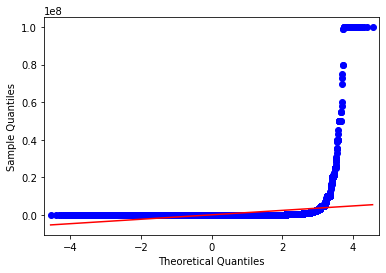

In [46]:
model1 = smf.ols('goal ~ C(state)', data = dg).fit()
aov_table1 = anova_lm(model1, typ=2)
residuals1 = model1.resid
fig1 = sm.qqplot(residuals1, line='s')
plt.show()

In [47]:
mc = multi.MultiComparison(dg['goal'], dg['state'])
result = mc.tukeyhsd()
print(result.summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
  canceled     failed  -18846.2141 0.0474  -37568.9814   -123.4468   True
  canceled       live   -9430.6663    0.9  -75410.4449  56549.1123  False
  canceled successful  -76030.0991  0.001  -95469.8006 -56590.3976   True
  canceled  suspended   95177.7372 0.0095   14869.2686 175486.2058   True
  canceled  undefined   -81787.666 0.0011 -140809.6908 -22765.6413   True
    failed       live    9415.5478    0.9  -54754.1271  73585.2227  False
    failed successful   -57183.885  0.001  -69113.5951 -45254.1749   True
    failed  suspended  114023.9513  0.001   35195.8718 192852.0308   True
    failed  undefined  -62941.4519 0.0205 -119932.8144  -5950.0895   True
      live successful  -66599.4328 0.0377 -130981.9394  -2216.9262   True
      live  suspended  104608.4035 0.0

In [48]:
#Sample 3
fvalue, pvalue = stats.f_oneway(dg[dg.state == 'canceled'].backers,
                                dg[dg.state == 'failed'].backers,
                                dg[dg.state == 'live'].backers,
                                dg[dg.state == 'successful'].backers,
                                dg[dg.state == 'suspended'].backers,
                                dg[dg.state == 'undefined'].backers)
print(fvalue, pvalue)

1290.0293657227435 0.0


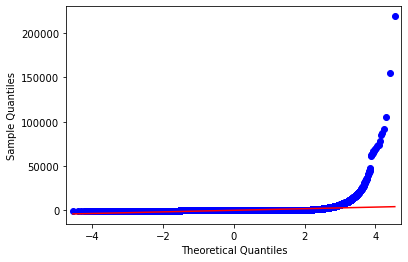

In [49]:
model2 = smf.ols('backers ~ C(state)', data = dg).fit()
aov_table2 = anova_lm(model2, typ=2)
residuals2 = model2.resid
fig2 = sm.qqplot(residuals2, line='s')
plt.show()

In [50]:
mc = multi.MultiComparison(dg['backers'], dg['state'])
result = mc.tukeyhsd()
print(result.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1     group2    meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------
  canceled     failed    -9.565 0.3947   -23.802     4.672  False
  canceled       live   42.1123  0.159   -8.0595   92.2841  False
  canceled successful   237.934  0.001  223.1518  252.7161   True
  canceled  suspended    79.095 0.0031   18.0275  140.1624   True
  canceled  undefined  -25.9874  0.556  -70.8684   18.8936  False
    failed       live   51.6773 0.0306     2.882  100.4727   True
    failed successful   247.499  0.001  238.4275  256.5705   True
    failed  suspended     88.66  0.001   28.7182  148.6018   True
    failed  undefined  -16.4224 0.8853  -59.7592   26.9145  False
      live successful  195.8217  0.001  146.8645  244.7789   True
      live  suspended   36.9827  0.717  -39.8778  113.8431  False
      live  undefined  -68.0997 0.0326   -132.85   -3.3494   True
successful

In [51]:
#Sample 4
fvalue, pvalue = stats.f_oneway(dg[dg.main_category == 'Art'].goal,
                                dg[dg.main_category == 'Comics'].goal,
                                dg[dg.main_category == 'Crafts'].goal,
                                dg[dg.main_category == 'Dance'].goal,
                                dg[dg.main_category == 'Design'].goal,
                                dg[dg.main_category == 'Fashion'].goal,
                                dg[dg.main_category == 'Film & Video'].goal,
                                dg[dg.main_category == 'Food'].goal,
                                dg[dg.main_category == 'Games'].goal,
                                dg[dg.main_category == 'Journalism'].goal,
                                dg[dg.main_category == 'Music'].goal,
                                dg[dg.main_category == 'Photography'].goal,
                                dg[dg.main_category == 'Publishing'].goal,
                                dg[dg.main_category == 'Technology'].goal,
                                dg[dg.main_category == 'Theater'].goal)
                                
print(fvalue, pvalue)

19.560230808159982 3.4368860940964916e-50


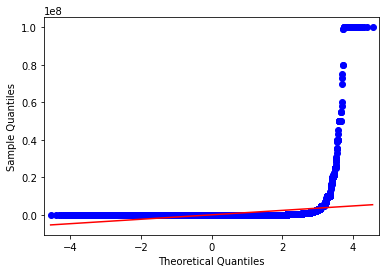

In [52]:
model3 = smf.ols('goal ~ C(main_category)', data = dg).fit()
aov_table3 = anova_lm(model3, typ=2)
residuals3 = model3.resid
fig3 = sm.qqplot(residuals3, line='s')
plt.show()

In [53]:
mc = multi.MultiComparison(dg['goal'], dg['main_category'])
result = mc.tukeyhsd()
print(result.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
   group1       group2      meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------------------
         Art       Comics -20585.5338    0.9   -65967.099  24796.0313  False
         Art       Crafts -29236.8942 0.7545  -78216.0291  19742.2406  False
         Art        Dance -30507.8489    0.9 -100103.0798  39087.3821  False
         Art       Design   5904.4501    0.9  -27367.4236  39176.3238  False
         Art      Fashion -16010.9341    0.9  -51748.9129  19727.0446  False
         Art Film & Video  43504.8295  0.001   14784.1984  72225.4607   True
         Art         Food   7864.5653    0.9  -27149.5607  42878.6913  False
         Art        Games   9882.1182    0.9  -22189.7324  41953.9687  False
         Art   Journalism  47954.3968 0.3827  -14948.7203 110857.5139  False
         Art        Music -24772.8228 0.2312   -54467.276   4921.6304  False

In [54]:
#Sample 5
fvalue, pvalue = stats.f_oneway(dg[dg.main_category == 'Art'].pledged,
                                dg[dg.main_category == 'Comics'].pledged,
                                dg[dg.main_category == 'Crafts'].pledged,
                                dg[dg.main_category == 'Dance'].pledged,
                                dg[dg.main_category == 'Design'].pledged,
                                dg[dg.main_category == 'Fashion'].pledged,
                                dg[dg.main_category == 'Film & Video'].pledged,
                                dg[dg.main_category == 'Food'].pledged,
                                dg[dg.main_category == 'Games'].pledged,
                                dg[dg.main_category == 'Journalism'].pledged,
                                dg[dg.main_category == 'Music'].pledged,
                                dg[dg.main_category == 'Photography'].pledged,
                                dg[dg.main_category == 'Publishing'].pledged,
                                dg[dg.main_category == 'Technology'].pledged,
                                dg[dg.main_category == 'Theater'].pledged)
                                
print(fvalue, pvalue)

212.71623901998618 0.0


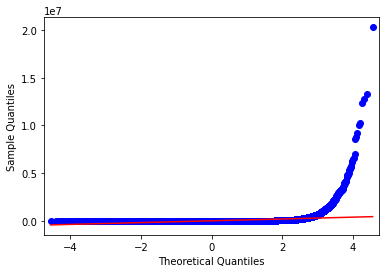

In [55]:
model4 = smf.ols('pledged ~ C(main_category)', data = dg).fit()
aov_table4 = anova_lm(model4, typ=2)
residuals4 = model4.resid
fig4 = sm.qqplot(residuals4, line='s')
plt.show()

In [56]:
#Sample 6
fvalue, pvalue = stats.f_oneway(dg[dg.main_category == 'Art'].backers,
                                dg[dg.main_category == 'Comics'].backers,
                                dg[dg.main_category == 'Crafts'].backers,
                                dg[dg.main_category == 'Dance'].backers,
                                dg[dg.main_category == 'Design'].backers,
                                dg[dg.main_category == 'Fashion'].backers,
                                dg[dg.main_category == 'Film & Video'].backers,
                                dg[dg.main_category == 'Food'].backers,
                                dg[dg.main_category == 'Games'].backers,
                                dg[dg.main_category == 'Journalism'].backers,
                                dg[dg.main_category == 'Music'].backers,
                                dg[dg.main_category == 'Photography'].backers,
                                dg[dg.main_category == 'Publishing'].backers,
                                dg[dg.main_category == 'Technology'].backers,
                                dg[dg.main_category == 'Theater'].backers)
                                
print(fvalue, pvalue)

268.7168050615326 0.0


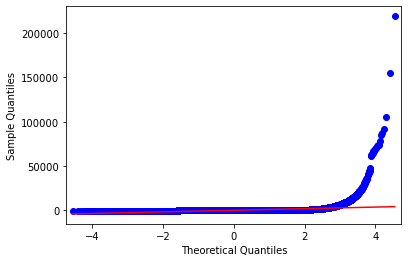

In [57]:
model5 = smf.ols('backers ~ C(main_category)', data = dg).fit()
aov_table5 = anova_lm(model5, typ=2)
residuals5 = model5.resid
fig5 = sm.qqplot(residuals5, line='s')
plt.show()

In [58]:
#Sample 7
fvalue, pvalue = stats.f_oneway(dg[dg.currency == 'AUD'].goal,
                                dg[dg.currency == 'CAD'].goal,
                                dg[dg.currency == 'CHF'].goal,
                                dg[dg.currency == 'DKK'].goal,
                                dg[dg.currency == 'EUR'].goal,
                                dg[dg.currency == 'GBP'].goal,
                                dg[dg.currency == 'HKD'].goal,
                                dg[dg.currency == 'JPY'].goal,
                                dg[dg.currency == 'MXN'].goal,
                                dg[dg.currency == 'NOK'].goal,
                                dg[dg.currency == 'NZD'].goal,
                                dg[dg.currency == 'SEK'].goal,
                                dg[dg.currency == 'SGD'].goal,
                                dg[dg.currency == 'USD'].goal)
                                
print(fvalue, pvalue)

36.89276832708766 3.612566260141462e-94


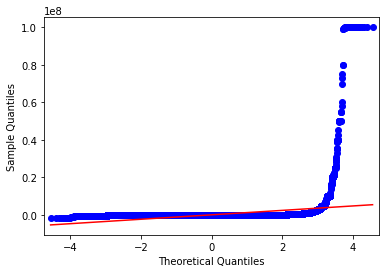

In [59]:
model6 = smf.ols('goal ~ C(currency)', data = dg).fit()
aov_table6 = anova_lm(model6, typ=2)
residuals6 = model6.resid
fig6 = sm.qqplot(residuals6, line='s')
plt.show()

In [60]:
#Sample 8
fvalue, pvalue = stats.f_oneway(dg[dg.currency == 'AUD'].pledged,
                                dg[dg.currency == 'CAD'].pledged,
                                dg[dg.currency == 'CHF'].pledged,
                                dg[dg.currency == 'DKK'].pledged,
                                dg[dg.currency == 'EUR'].pledged,
                                dg[dg.currency == 'GBP'].pledged,
                                dg[dg.currency == 'HKD'].pledged,
                                dg[dg.currency == 'JPY'].pledged,
                                dg[dg.currency == 'MXN'].pledged,
                                dg[dg.currency == 'NOK'].pledged,
                                dg[dg.currency == 'NZD'].pledged,
                                dg[dg.currency == 'SEK'].pledged,
                                dg[dg.currency == 'SGD'].pledged,
                                dg[dg.currency == 'USD'].pledged)
                                
print(fvalue, pvalue)

177.62327618366166 0.0


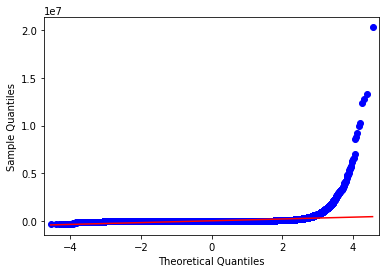

In [61]:
model7 = smf.ols('pledged ~ C(currency)', data = dg).fit()
aov_table7 = anova_lm(model7, typ=2)
residuals7 = model7.resid
fig7 = sm.qqplot(residuals7, line='s')
plt.show()

In [62]:
#Sample 9
fvalue, pvalue = stats.f_oneway(dg[dg.currency == 'AUD'].backers,
                                dg[dg.currency == 'CAD'].backers,
                                dg[dg.currency == 'CHF'].backers,
                                dg[dg.currency == 'DKK'].backers,
                                dg[dg.currency == 'EUR'].backers,
                                dg[dg.currency == 'GBP'].backers,
                                dg[dg.currency == 'HKD'].backers,
                                dg[dg.currency == 'JPY'].backers,
                                dg[dg.currency == 'MXN'].backers,
                                dg[dg.currency == 'NOK'].backers,
                                dg[dg.currency == 'NZD'].backers,
                                dg[dg.currency == 'SEK'].backers,
                                dg[dg.currency == 'SGD'].backers,
                                dg[dg.currency == 'USD'].backers)
                                
print(fvalue, pvalue)

6.2406502879628265 6.786100668656524e-12


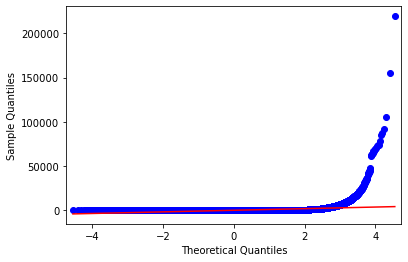

In [63]:
model8 = smf.ols('backers ~ C(currency)', data = dg).fit()
aov_table8 = anova_lm(model8, typ=2)
residuals8 = model8.resid
fig8 = sm.qqplot(residuals8, line='s')
plt.show()

In [64]:
#Sample 10
fvalue, pvalue = stats.f_oneway(dg[dg.country == 'GB'].backers,
                                dg[dg.country == 'US'].backers,
                                dg[dg.country == 'CA'].backers,
                                dg[dg.country == 'AU'].backers,
                                dg[dg.country == 'NO'].backers,
                                dg[dg.country == 'IT'].backers,
                                dg[dg.country == 'DE'].backers,
                                dg[dg.country == 'IE'].backers,
                                dg[dg.country == 'MX'].backers,
                                dg[dg.country == 'ES'].backers,
                                dg[dg.country == 'SE'].backers,
                                dg[dg.country == 'FR'].backers,
                                dg[dg.country == 'NL'].backers,
                                dg[dg.country == 'NZ'].backers)
                                
print(fvalue, pvalue)

6.475735141576487 1.795392914954268e-12


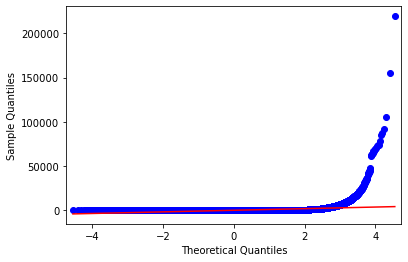

In [65]:
model9 = smf.ols('backers ~ C(country)', data = dg).fit()
aov_table9 = anova_lm(model9, typ=2)
residuals9 = model9.resid
fig9 = sm.qqplot(residuals9, line='s')
plt.show()

In [66]:
#Sample 11
fvalue, pvalue = stats.f_oneway(dg[dg.country == 'GB'].goal,
                                dg[dg.country == 'US'].goal,
                                dg[dg.country == 'CA'].goal,
                                dg[dg.country == 'AU'].goal,
                                dg[dg.country == 'NO'].goal,
                                dg[dg.country == 'IT'].goal,
                                dg[dg.country == 'DE'].goal,
                                dg[dg.country == 'IE'].goal,
                                dg[dg.country == 'MX'].goal,
                                dg[dg.country == 'ES'].goal,
                                dg[dg.country == 'SE'].goal,
                                dg[dg.country == 'FR'].goal,
                                dg[dg.country == 'NL'].goal,
                                dg[dg.country == 'NZ'].goal)
print(fvalue, pvalue)

25.95399860226593 3.7113610839185574e-64


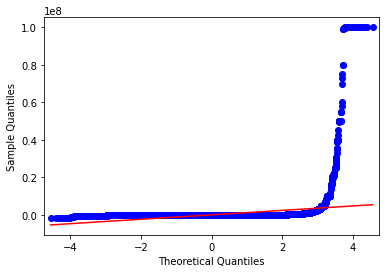

In [67]:
model10 = smf.ols('goal ~ C(country)', data = dg).fit()
aov_table10 = anova_lm(model10, typ=2)
residuals10 = model10.resid
fig10 = sm.qqplot(residuals10, line='s')
plt.show()

In [68]:
#Sample 12
fvalue, pvalue = stats.f_oneway(dg[dg.country == 'GB'].pledged,
                                dg[dg.country == 'US'].pledged,
                                dg[dg.country == 'CA'].pledged,
                                dg[dg.country == 'AU'].pledged,
                                dg[dg.country == 'NO'].pledged,
                                dg[dg.country == 'IT'].pledged,
                                dg[dg.country == 'DE'].pledged,
                                dg[dg.country == 'IE'].pledged,
                                dg[dg.country == 'MX'].pledged,
                                dg[dg.country == 'ES'].pledged,
                                dg[dg.country == 'SE'].pledged,
                                dg[dg.country == 'FR'].pledged,
                                dg[dg.country == 'NL'].pledged,
                                dg[dg.country == 'NZ'].pledged)
                                
print(fvalue, pvalue)

64.11030939836037 1.4986333786689407e-169


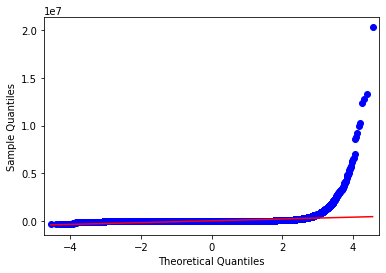

In [69]:
model11 = smf.ols('pledged ~ C(country)', data = dg).fit()
aov_table11 = anova_lm(model11, typ=2)
residuals11 = model11.resid
fig11 = sm.qqplot(residuals11, line='s')
plt.show()

# 4. Correlation Testing

Korelasi testing ini untuk mengetahui kolom numerik mana yang berhubungan dengan kolom numerik yang lain. Jika:
- Korelasi positif = hubungan antardua kolom / variabel itu menunjukkan arah yang sama, jika x mengalamin kenaikan atau pertambahan, akan diikuti pula dengan kenaikan variabel y
- Korelasi negatif = hubungan antardua kolom / variabel itu menunjukkan arah yang sama, jika x mengalamin kenaikan atau pertambahan, akan diikuti pula dengan penurunan variabel y

- 0                : Tidak ada hubungan
- 0.01 - 0.09      : Hubungan Kurang Berarti
- 0.10 - 0.29      : Hubungan lemah
- 0.30 - 0.49      : Hubungan modereat
- 0.50 - 0.69      : Hubungan Kuat
- 0.70 - 0.89      : Hubungan Sangat Kuat
- lebih dari 0.90  : Hubungan mendekati sempurna

In [70]:
dg.corr()

,ID,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001679,0.000466,0.000654,-0.000641,-0.000025,0.001854
goal,0.001679,1.000000,0.007358,0.004012,0.005567,0.005104,0.942692
pledged,0.000466,0.007358,1.000000,0.717079,0.856429,0.952843,0.005024
backers,0.000654,0.004012,0.717079,1.000000,0.697455,0.752539,0.004517
usd_pledged,-0.000641,0.005567,0.856429,0.697455,1.000000,0.906639,0.006204
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,0.906639,1.000000,0.005596
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.006204,0.005596,1.000000


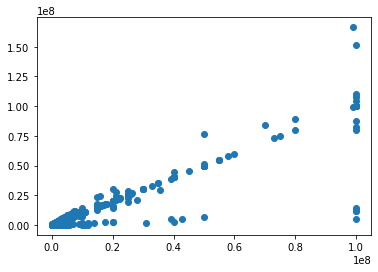

In [71]:
#Sample 1
plt.scatter(dg['goal'],dg['usd_goal_real'])

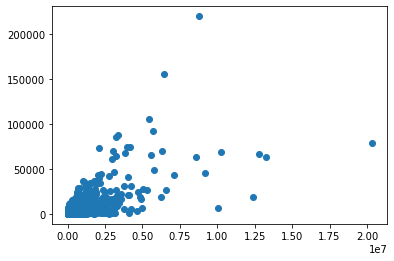

In [72]:
#Sample 2
plt.scatter(dg['pledged'],dg['backers'])

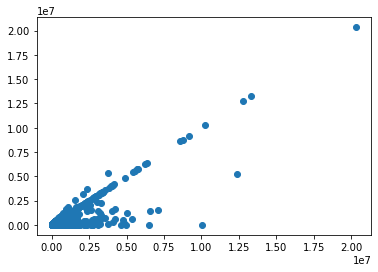

In [73]:
#Sample 3
plt.scatter(dg['pledged'],dg['usd_pledged'])

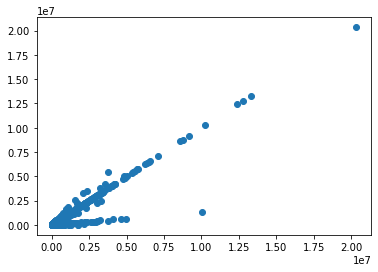

In [74]:
#Sample 4
plt.scatter(dg['pledged'],dg['usd_pledged_real'])

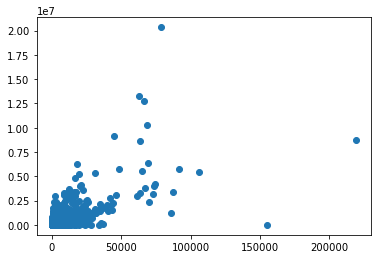

In [75]:
#Sample 5
plt.scatter(dg['backers'],dg['usd_pledged'])

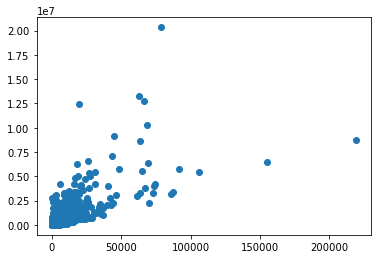

In [76]:
#Sample 6
plt.scatter(dg['backers'],dg['usd_pledged_real'])

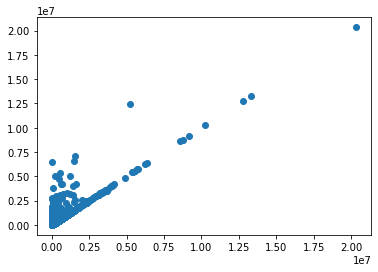

In [77]:
#Sample 7
plt.scatter(dg['usd_pledged'],dg['usd_pledged_real'])

# 5. T Testing

Setelah melakukan Uji Anova maka bisa juga dilakukan secara t-Test. Kedua uji tersebut sama-sama betujuan untuk membandingkan nilai rata-rata.
Perbedaan yang mendasar adalah dimana uji independent sample t-test sendiri digunakan untuk membnadingkan nilai rata-rata variabel pada dua kelompok saja. t-Testing ini dijalankan untuk menguji kebenaran atau kepalsuan hipotesis nol yang diambil secara random dari populasi yang sama

- H0 : Memiliki varian yang sedikit berbeda, hanya dilakukan 2 kelompok
- H1 : Memiliki varian yang sangat berbeda, hanya dilakukan 2 kelompok

In [78]:
#Sample 1
res = stats.ttest_ind(dg[dg.main_category == 'Music'].pledged,
                      dg[dg.main_category == 'Photography'].pledged,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.0510


In [79]:
#Sample 2
res = stats.ttest_ind(dg[dg.main_category == 'Music'].pledged,
                      dg[dg.main_category == 'Theater'].pledged,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.2089


In [80]:
#Sample 3
res = stats.ttest_ind(dg[dg.main_category == 'Publishing'].pledged,
                      dg[dg.main_category == 'Art'].pledged,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.4402


In [81]:
#Sample 4
res = stats.ttest_ind(dg[dg.main_category == 'Publishing'].pledged,
                      dg[dg.main_category == 'Photography'].pledged,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.4511


In [82]:
#Sample 5
res = stats.ttest_ind(dg[dg.main_category == 'Publishing'].pledged,
                      dg[dg.main_category == 'Dance'].pledged,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.3778


In [83]:
#Sample 6
res = stats.ttest_ind(dg[dg.currency == 'CHF'].backers,
                         dg[dg.currency == 'DKK'].backers,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1131


In [84]:
#Sample 7
res = stats.ttest_ind(dg[dg.currency == 'AUD'].backers,
                      dg[dg.currency == 'CAD'].backers,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')


p-value for single sided test: 0.2216


In [85]:
#Sample 6
res = stats.ttest_ind(dg[dg.state == 'failed'].goal,
                      dg[dg.state == 'suspended'].goal,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.0779


In [86]:
#Sample 7
res = stats.ttest_ind(dg[dg.state == 'canceled'].goal,
                      dg[dg.state == 'suspended'].goal,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1188


In [87]:
#Sample 8
res = stats.ttest_ind(dg[dg.state == 'canceled'].goal,
                      dg[dg.state == 'live'].goal,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.3978


In [88]:
#Sample 9
res = stats.ttest_ind(dg[dg.state == 'failed'].goal,
                      dg[dg.state == 'live'].goal,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.3962


In [89]:
#Sample 10
res = stats.ttest_ind(dg[dg.state == 'live'].goal,
                      dg[dg.state == 'suspended'].goal,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1168


# 6. Paired t-Test (Uji t berpasangan)

Uji Paired Sample T Test adalah pengujian yang digunakan untuk membandingkan selisih dua mean dari dua sampel yang berpasangan dengan asumsi data berdistribusi normal. Sampel berpasangan berasal dari subjek yang sama, setiap variabel diambil saat situasi dan keadaan yang berbeda. Uji ini juga disebut Uji T.

Uji Paired Sample T Test menunjukkan apakah sampel berpasangan mengalami perubahan yang bermakna. Hasil uji Paired Sample T Test ditentukan oleh nilai signifikansinya. Nilai ini kemudian menentukan keputusan yang diambil dalam penelitian.

- H0 = Menunjukkan adanya perbedaan yang signifikan antara variabel awal dengan variabel akhir. Ini menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel.
- H1 = Menunjukkan tidak terdapat perbedaan yang signifikan antara variabel awal dengan variabel akhir. Ini menunjukkan tidak terdapat pengaruh yang bermakna terhadap perbedaan perlakukan yang diberikan pada masing-masing variabel

t-statistic:-5.626317542058192
p-value:0.000000


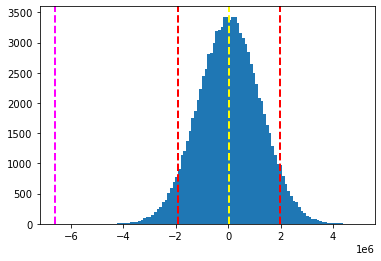

In [90]:
#Sample 1
np.random.seed(123)
midTerm = dg['goal']
endTerm = dg['usd_goal_real']

# Paired (related) test
t,p = stats.ttest_rel(endTerm, midTerm)
# ttest_rel is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(midTerm.mean(), midTerm.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, midTerm.mean(), midTerm.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

t-statistic:25.46678534645602
p-value:0.000000


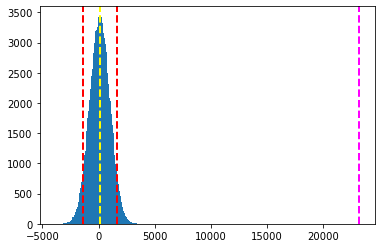

In [91]:
#Sample 2
np.random.seed(123)
midTerm = dg['backers']
endTerm = dg['goal']

# Paired (related) test
t,p = stats.ttest_rel(endTerm, midTerm)
# ttest_rel is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(midTerm.mean(), midTerm.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, midTerm.mean(), midTerm.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

t-statistic:20.432060166847528
p-value:0.000000


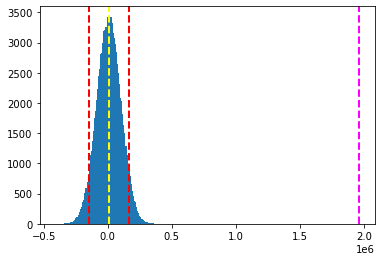

In [92]:
#Sample 3
np.random.seed(123)
midTerm = dg['pledged']
endTerm = dg['goal']

# Paired (related) test
t,p = stats.ttest_rel(endTerm, midTerm)
# ttest_rel is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(midTerm.mean(), midTerm.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, midTerm.mean(), midTerm.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

t-statistic:33.767725685656686
p-value:0.000000


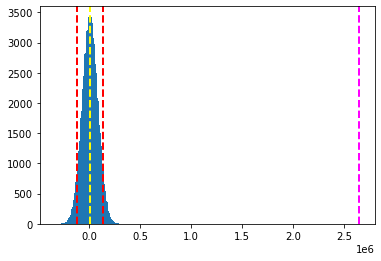

In [93]:
#Sample 4
np.random.seed(123)
midTerm = dg['usd_pledged']
endTerm = dg['pledged']

# Paired (related) test
t,p = stats.ttest_rel(endTerm, midTerm)
# ttest_rel is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(midTerm.mean(), midTerm.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, midTerm.mean(), midTerm.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

t-statistic:-20.757939424595914
p-value:0.000000


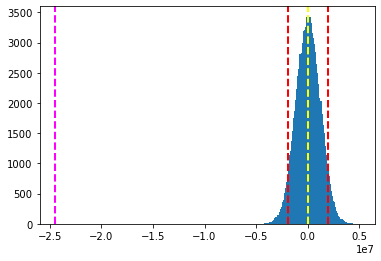

In [94]:
#Sample 5
np.random.seed(123)
midTerm = dg['goal']
endTerm = dg['usd_pledged_real']

# Paired (related) test
t,p = stats.ttest_rel(endTerm, midTerm)
# ttest_rel is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(midTerm.mean(), midTerm.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, midTerm.mean(), midTerm.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Overall Analysis

Dengan melakukan pengecekan pada distribusi pada setiap kolom numerik kontinu, dengan melakukan sampling mean, median dan modus pada tabel bahwa distribusi dilakukan secara tidak normal karena berbentuk tidak simetris hingga mean, median, dan modus menyebar

Dari data tabel diatas kita dapat menganalisa bahwa tabel bisa dilakukan beberapa hipotesis:


1. Kolom kategorik dengan kolom kategorik:
    1. CHI2-Testing:
        - Antara Kolom MAIN_CATEGORY dan CATEGORY memiliki p-value 0 < 0.05 yang artinya menerima h1 yang berarti berhubungan kolom satu dengan kolom kedua.
        - Antara kolom MAIN_CATEGORY dan COUNTRY utama memiliki p-value 0 < 0.05 yang artinya menerima h1 yang berarti berhubungan kolom satu dengan kolom kedua.
        - Antara MAIN_CATEGORY dan CURRENCY memiliki p-value 0 < 0.05 yang artinya menerima h1 yang berarti berhubungan kolom satu dengan  kolom kedua.
        - Antara kolom MAIN_CATEGORY dan STATE memiliki p-value 0 < 0.05 yang artinya menerima h1 yang berarti berhubungan kolom satu dengan kolom kedua.
        - Antara Kolom CATEGORY dan CURRENCY memiliki p-value 0 < 0.05 yang artinya menerima h1 yang berarti berhubungan kolom satu dengan kolom kedua.
        - Antara kolom CATEGORY dan COUNTRY utama memiliki p-value 0 < 0.05 yang artinya menerima h1 yang berarti berhubungan kolom satu dengan kolom kedua.
        - Antara MAIN_CATEGORY dan STATE memiliki p-value 0 < 0.05 yang artinya menerima h1 yang berarti berhubungan kolom satu dengan kolom kedua.
        - Antara kolom COUNTRY dan STATE memiliki p-value 0 < 0.05 yang artinya menerima h1 yang berarti berhubungan kolom satu dengan kolom kedua.
        - Antara Kolom COUNTRY dan CURRENCY memiliki p-value 0 < 0.05 yang artinya menerima h1 yang berarti berhubungan kolom satu dengan kolom kedua.
        - Antara kolom STATE dan CURRENCY utama memiliki p-value 0 < 0.05 yang artinya menerima h1 yang berarti berhubungan kolom satu dengan kolom kedua.
        
    2. Fisher Exact Testing:
        > Digunakan untuk proporsi relatif dari satu variabel terkait atau tidak dengan variabel kedua untuk sampel yang relatif kecil atau hanya tediri dari 2 baris dan 2 kolom
          - Pada variabel Food dan Journalism yang dihubungkan dengan country FR, AU memiliki p value = 0.216 > 0.05 yang disimpulkan, proporsional relatif dari satu variabel tidak terkait dengan variabel kedua
          - Pada variabel Successful dan Canceled yang dihubungkan dengan Main_Category Journalism dan Food memiliki p value = 0.000 > 0.05 yang disimpulkan, proporsional relatif dari satu variabel sangat terkait dengan variabel kedua

2. Kolom Kategorik dengan Kolom Numerik:
    1. Anova Testing:
        - Kelompok pada kolom STATE yang memiliki nilai kolom PLEDGED nilai signifikansi 0 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan berbeda secara signifikan.
        - Kelompok pada kolom STATE yang memiliki nilai kolom GOAL nilai signifikansi 4.149817095643392e-54 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan, tetapi tidak semuanya berbeda
        - Kelompok pada kolom STATE yang memiliki nilai kolom BACKERS nilai signifikansi 0 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan berbeda secara signifikan.
        - Kelompok pada kolom MAIN_CATEGORY yang memiliki nilai kolom PLEDGED nilai signifikansi 3.4368860940964916e-50 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan berbeda secara signifikan, tetapi tidak semuanya berbeda
        - Kelompok pada kolom MAIN_CATEGORY yang memiliki nilai kolom GOAL nilai signifikansi 0 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan berbeda secara signifikan.
        - Kelompok pada kolom MAIN_CATEGORY yang memiliki nilai kolom BACKERS nilai signifikansi 0 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan berbeda secara signifikan.
        - Kelompok pada kolom CURRENCY yang memiliki nilai kolom PLEDGED nilai signifikansi 3.612566260141462e-94 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan berbeda secara signifikan, tetapi tidak semuanya berbeda
        - Kelompok pada kolom CURRENCY yang memiliki nilai kolom GOAL nilai signifikansi 0 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan berbeda secara signifikan.
        - Kelompok pada kolom CURRENCY yang memiliki nilai kolom BACKERS nilai signifikansi 6.786100668656524e-12 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan berbeda secara signifikan, tetapi tidak semuanya berbeda
        - Kelompok pada kolom COUNTRY yang memiliki nilai kolom PLEDGED nilai signifikansi 1.795392914954268e-12 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan berbeda secara signifikan, tetapi tidak semuanya berbeda
        - Kelompok pada kolom COUNTRY yang memiliki nilai kolom GOAL nilai signifikansi 3.7113610839185574e-64 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan berbeda secara signifikan, tetapi tidak semuanya berbeda
        - Kelompok pada kolom COUNTRY yang memiliki nilai kolom BACKERS nilai signifikansi 1.4986333786689407e-169 < 0,05, maka dapat disimpulkan bahwa variannya yang kita bandingkan berbeda secara signifikan, tetapi tidak semuanya berbeda
        
        Pada Anova testing varian dalam kolom berbeda secara signifikan, tetapi dalam testing tersebut dimiliki nilai walaupun sebesar 0.0001 artinya ada values dalam kolom secara independen yang memiliki varian yang sama dan akan dijalankan t-test yang secara independen untuk mengetahui values kolom mana yang memiliki varian yang sama. 
        
    2. t-Testing
    > Dijalankan untuk menguji kebenaran atau kepalsuan hipotesis nol yang diambil secara random dari populasi yang sama dan t-testing hanya dilakukan dari 2 kelompok. Dibawah ini yang hanya menunjukkan varian yang sama karena memiliki p-value > 0.05
        - Pada varian Live dan Suspended yang memiliki nilai kolom GOAL mempunyai varian yang hampir sama 
        - Pada varian Live dan Failed yang memiliki nilai kolom GOAL mempunyai varian yang hampir sama 
        - Pada varian Live dan Canceled yang memiliki nilai kolom GOAL mempunyai varian yang hampir sama 
        - Pada varian Failed dan Suspended yang memiliki nilai kolom GOAL mempunyai varian yang hampir sama 
        - Pada varian Canceled dan Suspended yang memiliki nilai kolom GOAL mempunyai varian yang hampir sama
        --------------------------------------------------------------------------------------------------------------
        - Pada varian Music dan Photography yang memiliki nilai kolom PLEDGED mempunyai varian yang hampir sama
        - Pada varian Music dan Theater yang memiliki nilai kolom PLEDGED mempunyai varian yang hampir sama
        - Pada varian Publishing dan Art yang memiliki nilai kolom PLEDGED mempunyai varian yang hampir sama
        - Pada varian Publishing dan Photography yang memiliki nilai kolom PLEDGED mempunyai varian yang hampir sama
        - Pada varian Publishing dan Dance yang memiliki nilai kolom PLEDGED mempunyai varian yang hampir sama
        - Pada varian Publishing dan Photography yang memiliki nilai kolom PLEDGED mempunyai varian yang hampir sama
        -------------------------------------------------------------------------------------------------------------------
        - Pada varian AUD dan CAD yang memiliki yang memiliki nilai kolom BACKERS mempunyai varian yang hampir sama
        - Pada varian CHF dan DKK yang memiliki yang memiliki nilai kolom BACKERS mempunyai varian yang hampir sama
        --------------------------------------------------------------------------------------------------------------------
        
        t-Testing untuk menindaklanjuti uji tes anova jika masih memiliki nilai p-value pada uji anova berarti tidak semua values pada kolom semua berbeda.
        

3. Kolom Numerik dengan Kolom Numerik:
    1. Correlation Testing:
        > Dalam melakukan correlation testing hanya memastikan apakah kolom satu dengan yang lain punya hubungan seberapa kuat
        - 0                : Tidak ada hubungan (X dan Y tidak berjalan secara paralel, tetapi berjalan2 masing di sumbunya)
        - 0.01 - 0.09      : Hampir Tidak Ada Hubungan
            - Hubungan antara kolom Goal dengan Pledged
            - Hubungan antara kolom Goal dengan Backers
            - Hubungan antara kolom Goal dengan Usd_pledged
            - Hubungan antara kolom Goal dengan Usd_pledged_real
            - Hubungan antara kolom Pledged dengan Usd_Goal_Real
            - Hubungan antara kolom Backers dengan Usd_Goal_Real
            - Hubungan antara kolom Usd_pledged dengan Usd_Goal_Real
            - Hubungan antara kolom Usd_pledged_Real dengan Usd_Goal_Real
        - 0.10 - 0.29      : Hubungan lemah
        - 0.30 - 0.49      : Hubungan moderat
        - 0.50 - 0.69      : Hubungan Kuat
        - 0.70 - 0.89      : Hubungan Sangat Kuat
            - Hubungan antara kolom Backers dengan Usd_Pledged
            - Hubungan antara kolom Backers dengan Usd_Pledged_Real
            - Hubungan antara kolom Pledged dengan Backers
            - Hubungan antara kolom Pledged dengan usd_pledged_real
        - lebih dari 0.90  : Hubungan mendekati sempurna (X dan Y berjalan secara paralel secara sempurna)
            - Hubungan antara kolom Usd_pledged dengan Usd_pledged_real
            - Hubungan antara kolom Goal dengan Usd_Goal_Real
            - Hubungan antara kolom Pledged dengan Usd_pledged_Real
          
    2. 2-Paired t-Test
          > Dalam melakukan ini 2-paired t-test ini sebenarnya hanya ingin mengetahui apakah hubungan antara kolom numerik terjalin signifikan atau tidak
          - Hubungan antara kolom GOAL dengan PLEDGED memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom GOAL dengan BACKERS memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom GOAL dengan USD_PLEDGED memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom GOAL dengan USD_PLEDGED_REAL memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom PLEDGED dengan USD_GOAL_REAL memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom BACKERS dengan USD_GOAL_REAL memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom USD_PLEDGED dengan USD_GOAL_REAL memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom USD_PLEDGED_REAL dengan USD_GOAL_REAL memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom BACKERS dengan USD_PLEDGED memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom BACKERS dengan USD_PLEDGED_REAL memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom PLEDGED dengan BACKERS memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom PLEDGED dengan USD_PLEDGED_REAL memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom USD_PLEDGED dengan USD_PLEDGED_REAL memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom GOAL dengan USD_GOAL_REAL memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel
          - Hubungan antara kolom PLEDGED dengan USD_PLEDGED_REAL memiliki p value=0 yang artinya, menunjukkan terdapat pengaruh yang bermakna terhadap perbedaan perlakuan yang diberikan pada masing-masing variabel